#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tqdm import tqdm

In [2]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
plt.style.use('seaborn-whitegrid')

C:\Users\abalwani6\AppData\Local\Temp\ipykernel_55720\2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#### Address, axes initializations

In [4]:
pp='C:/Users/abalwani6/Documents/Fall 2022/CorticalRNN/Repeated-Runs-V2/'

In [5]:
arch_mods = ['Cortical Microcircuit','No Feedback','Bidirectional Feedback',
             'Unidirectional Feedback','Same-sized Populations']

#### Initialise nRuns, n_epochs, noise values, PC dims, etc.

In [6]:
nRuns = 5
n_epochs = 50

In [7]:
dims23 = np.array([1,2,4,8,16,32,36])
dims4 = np.array([1,2,4,8,16,32])
dims56 = np.array([1,2,4,8,16,32,36])

In [8]:
noise_stds = np.linspace(0,2,6)
noise_stds = np.round(noise_stds,3)
noise_stds = noise_stds[1:]

In [9]:
spatAccs = {}

spatAccs[arch_mods[0]] = np.load(pp+'corticalRNN-spatial-noisy-accs.npy')[:,1:] + 1e-6
spatAccs[arch_mods[1]] = np.load(pp+'no-fb-spatial-noisy-accs.npy')[:,1:] + 1e-6
spatAccs[arch_mods[2]] = np.load(pp+'bidirectional-fb-spatial-noisy-accs.npy')[:,1:] + 1e-6
spatAccs[arch_mods[3]] = np.load(pp+'unidirectional-fb-spatial-noisy-accs.npy')[:,1:] + 1e-6
spatAccs[arch_mods[4]] = np.load(pp+'same-pop-spatial-noisy-accs.npy')[:,1:] + 1e-6

In [10]:
# df_spatial = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','Noise'])

In [11]:
# for rr in range(nRuns):
#     for cnt, mod in enumerate(arch_mods):
#         for nn, noise in enumerate(noise_stds):
#             for ee in range(n_epochs+1):
            
#                 arch = [(k,v) for k,v in spatAccs.items()][cnt][0]

#                 acc = [(k,v) for k,v in spatAccs.items()][cnt][1][rr,nn,ee]

#                 df_spatial.loc[len(df_spatial)] = [rr,ee,arch,acc,noise]

In [12]:
# df_spatial

In [13]:
# f = plt.figure(figsize=(15,5))
# sns.violinplot(data=df_spatial, x='Architecture', y='Accuracy', hue="Noise", palette='tab10',bw=0.2,cut=0)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Spatial Violation')

In [14]:
# f = plt.figure(figsize=(10,4))
# sns.boxplot(data=df_spatial, x='Architecture', y='Accuracy', whis=(0,100), hue="Noise")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Spatial Violation')

In [15]:
# f = plt.figure(figsize=(10,4))
# sns.boxenplot(data=df_spatial, x='Architecture', y='Accuracy', hue="Noise", showfliers = False)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Spatial Violation')

In [16]:
# f = plt.figure(figsize=(10,4))
# sns.stripplot(data=df_spatial, x='Architecture', y='Accuracy', hue="Noise",dodge=True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Spatial Violation')

In [17]:
# f = plt.figure(figsize=(10,4))
# sns.barplot(data=df_spatial, x='Architecture', y='Accuracy', hue="Noise")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Spatial Violation')

#### Temporal violation plots

In [10]:
cleanAccs = {}

cleanAccs[arch_mods[0]] = np.load(pp+'corticalRNN-no-violations-accs.npy')
cleanAccs[arch_mods[1]] = np.load(pp+'no-fb-no-violations-accs.npy')
cleanAccs[arch_mods[2]] = np.load(pp+'bidirectional-fb-no-violations-accs.npy')
cleanAccs[arch_mods[3]] = np.load(pp+'unidirectional-fb-no-violations-accs.npy')
cleanAccs[arch_mods[4]] = np.load(pp+'same-pop-no-violations-accs.npy')

In [11]:
# cleanAccs[arch_mods[3]] = (cleanAccs[arch_mods[2]] + cleanAccs[arch_mods[1]])*0.5

In [12]:
tempAccs = {}

tempAccs[arch_mods[0]] = np.load(pp+'corticalRNN-temporal-violations-accs.npy')
tempAccs[arch_mods[1]] = np.load(pp+'no-fb-temporal-violations-accs.npy')
tempAccs[arch_mods[2]] = np.load(pp+'bidirectional-fb-temporal-violations-accs.npy')
tempAccs[arch_mods[3]] = np.load(pp+'unidirectional-fb-temporal-violations-accs.npy')
tempAccs[arch_mods[4]] = np.load(pp+'same-pop-temporal-violations-accs.npy')

In [21]:
# tempAccs[arch_mods[3]] = (tempAccs[arch_mods[2]] + tempAccs[arch_mods[1]])*0.5

In [22]:
# df_temporal = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','Violation'])

In [23]:
# for rr in range(nRuns):
#     for cnt, mod in enumerate(arch_mods):
#         for ee in range(n_epochs+1):
            
#             arch = [(k,v) for k,v in tempAccs.items()][cnt][0]
            
#             acc_c = [(k,v) for k,v in cleanAccs.items()][cnt][1][rr,ee]
#             acc_v = [(k,v) for k,v in tempAccs.items()][cnt][1][rr,ee]
            
#             df_temporal.loc[len(df_temporal)] = [rr,ee,arch,acc_c,'Clean']
#             df_temporal.loc[len(df_temporal)] = [rr,ee,arch,acc_v,'Temporal violation']

In [24]:
# df_temporal

In [25]:
# f = plt.figure(figsize=(10,4))
# sns.violinplot(data=df_temporal, x='Architecture', y='Accuracy', hue="Violation", palette='tab10',bw=0.2,cut=0)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Temporal Violation')

In [26]:
# f = plt.figure(figsize=(10,4))
# sns.boxplot(data=df_temporal, x='Architecture', y='Accuracy', hue="Violation")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Temporal Violation')

In [27]:
# f = plt.figure(figsize=(10,4))
# sns.boxenplot(data=df_temporal, x='Architecture', y='Accuracy', hue="Violation",showfliers = True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Temporal Violation')

In [28]:
# f = plt.figure(figsize=(10,4))
# sns.stripplot(data=df_temporal, x='Architecture', y='Accuracy', hue="Violation",dodge=True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Temporal Violation')

In [29]:
# f = plt.figure(figsize=(10,4))
# sns.barplot(data=df_temporal, x='Architecture', y='Accuracy', hue="Violation")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across architectures in presence of Temporal Violation')

#### Spatial - Temporal joint plots

In [13]:
df_joint = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','Violation'])

In [14]:
for rr in range(nRuns):
    
    for cnt, mod in enumerate(arch_mods):
        
        for ee in range(n_epochs+1):
            
            arch_tp = [(k,v) for k,v in tempAccs.items()][cnt][0]
            
            acc_cl = [(k,v) for k,v in cleanAccs.items()][cnt][1][rr,ee]
            df_joint.loc[len(df_joint)] = [rr,ee,arch_tp,acc_cl,'Clean']
            
            acc_tp = [(k,v) for k,v in tempAccs.items()][cnt][1][rr,ee]
            df_joint.loc[len(df_joint)] = [rr,ee,arch_tp,acc_tp,'Temporal violation']
            
            for nn, noise in enumerate(noise_stds):
            
                arch_sp = [(k,v) for k,v in spatAccs.items()][cnt][0]

                acc_sp = [(k,v) for k,v in spatAccs.items()][cnt][1][rr,nn,ee]

                df_joint.loc[len(df_joint)] = [rr,ee,arch_sp,acc_sp,'Spatial violation']

In [15]:
cols_list = ['slategray','salmon','cornflowerblue']

Text(0.5, 1.0, 'Accuracy across Architectures in presence of Violations')

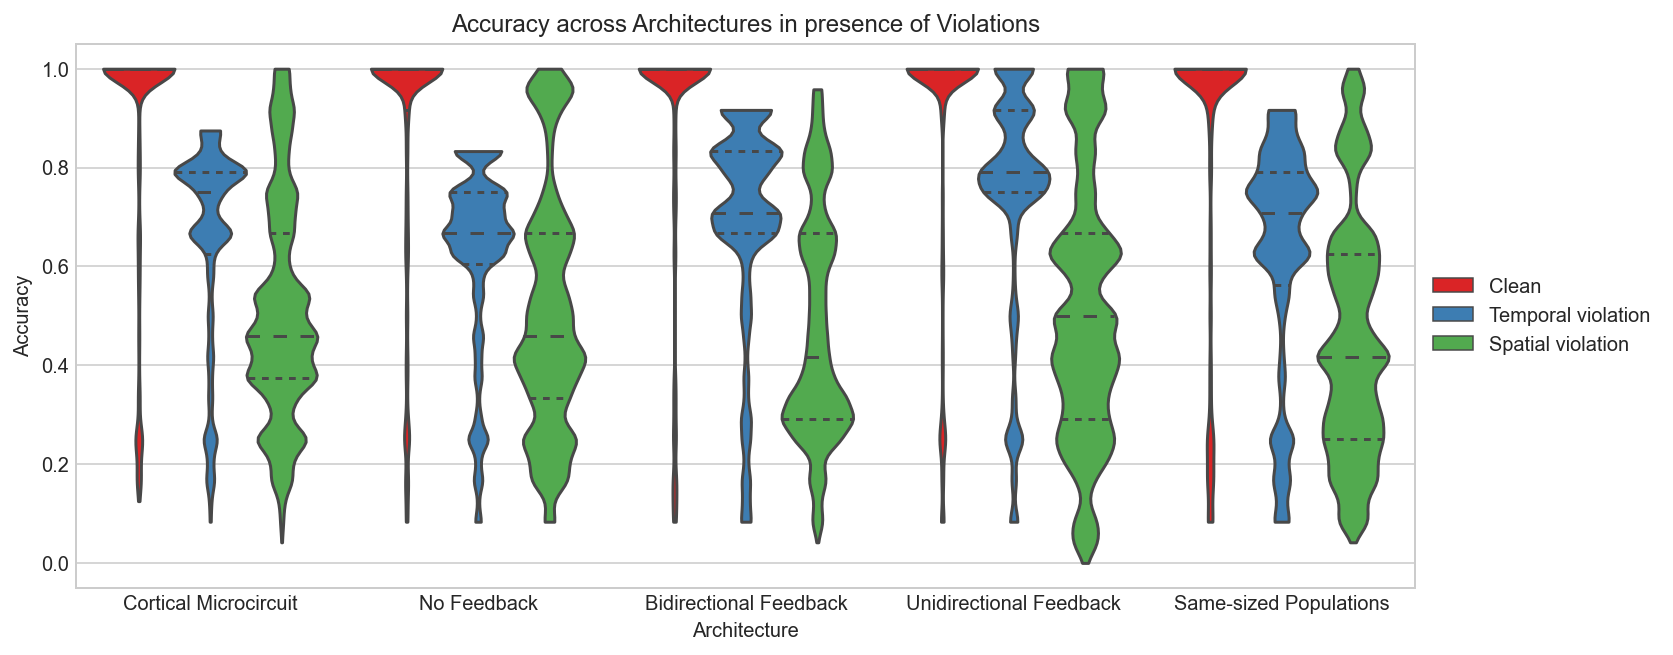

In [16]:
f = plt.figure(figsize=(12,5))
sns.violinplot(data=df_joint, x='Architecture', y='Accuracy', hue="Violation", palette='Set1',
               bw=0.1,cut=0, linewidth=1.5, saturation=0.9, inner='quartile', scale='width')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Accuracy across Architectures in presence of Violations')

In [34]:
# f = plt.figure(figsize=(15,5))
# sns.stripplot(data=df_joint, x='Architecture', y='Accuracy', hue="Violation", palette='tab10',dodge=True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across Architectures in presence of Violations')

Text(0.5, 1.0, 'Accuracy across Architectures in presence of Violations (Sequence Learning)')

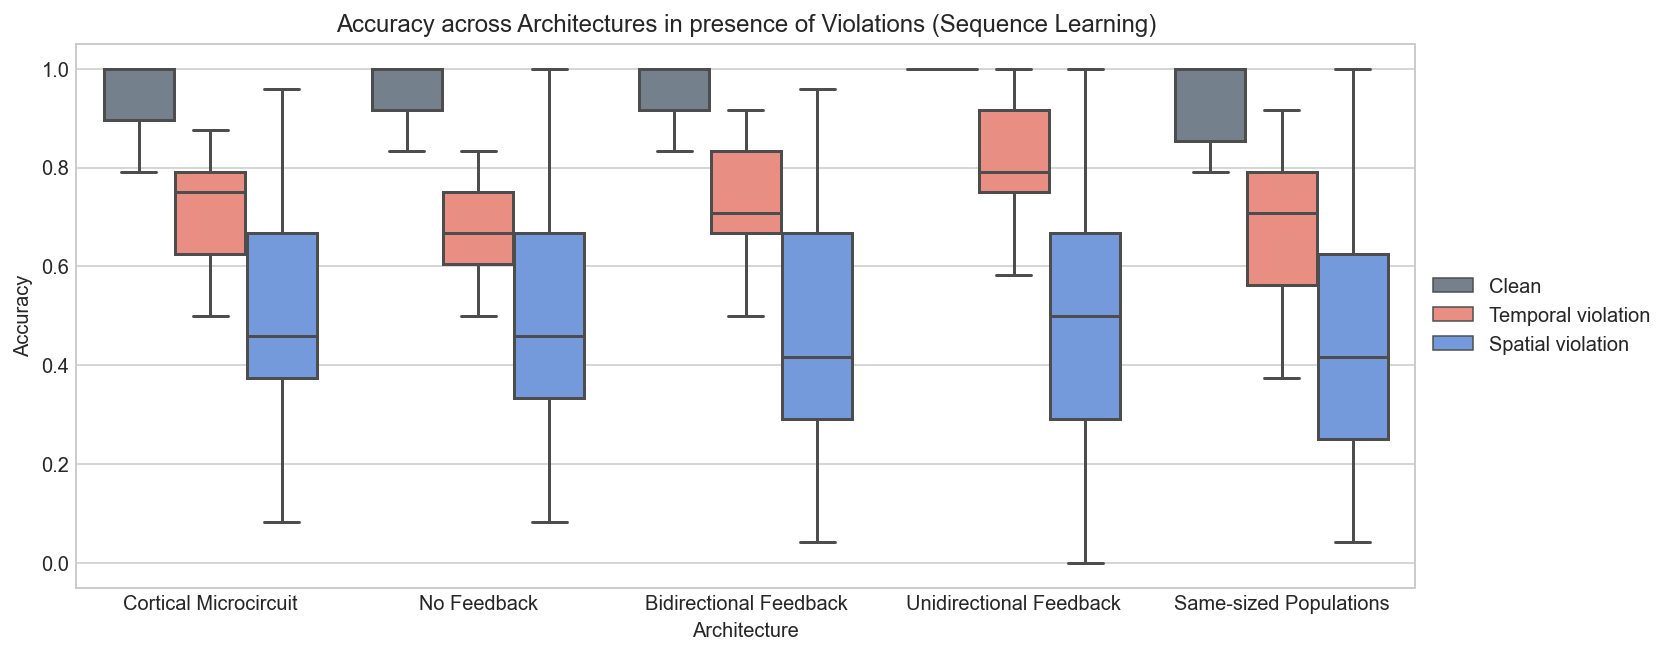

In [17]:
f = plt.figure(figsize=(12,5))
sns.boxplot(data=df_joint, x='Architecture', y='Accuracy', hue="Violation", palette=cols_list,
            dodge=True,fliersize=0.0,width=0.8,whis=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Accuracy across Architectures in presence of Violations (Sequence Learning)')

Text(0.5, 1.0, 'Accuracy across Architectures in presence of Violations (Sequence Learning)')

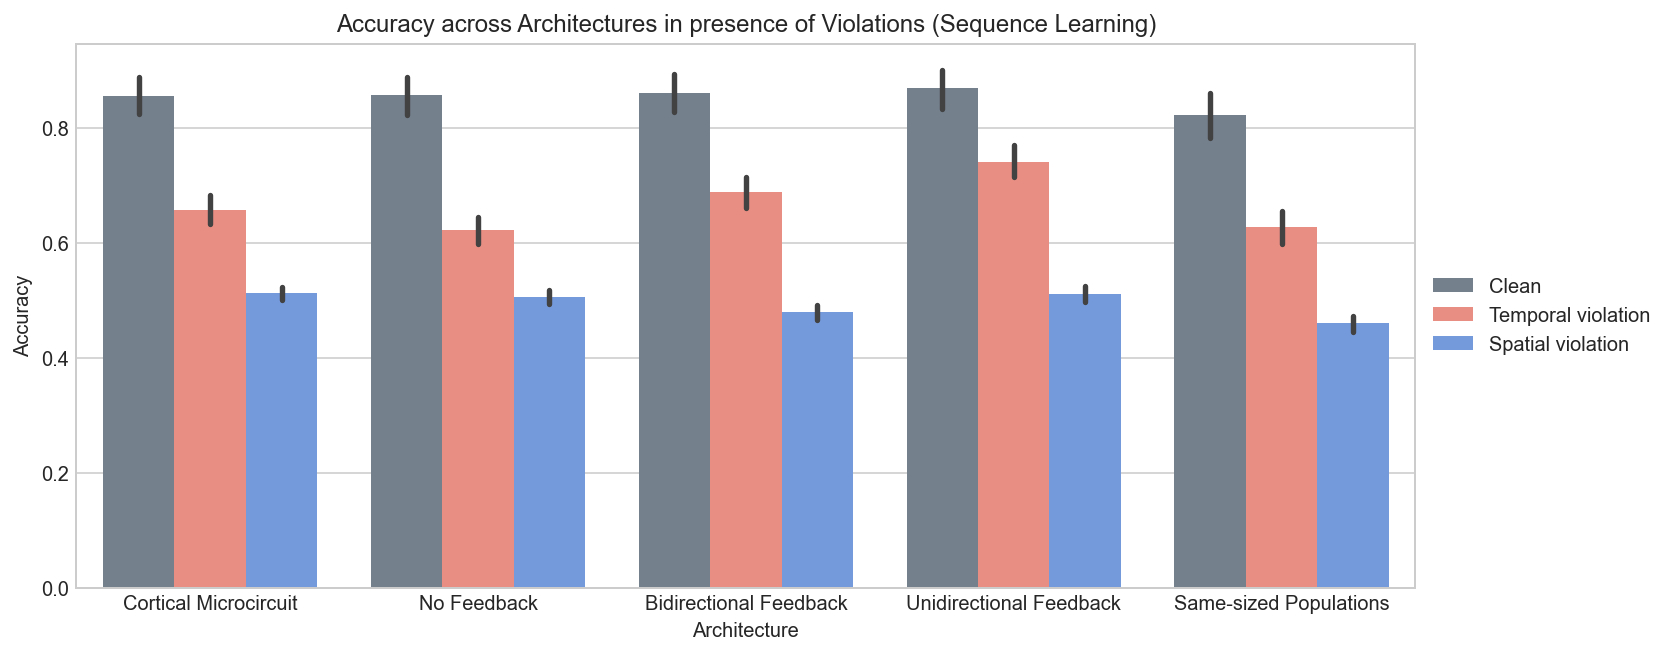

In [19]:
f = plt.figure(figsize=(12,5))
sns.barplot(data=df_joint, x='Architecture', y='Accuracy', hue="Violation", palette=cols_list)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Accuracy across Architectures in presence of Violations (Sequence Learning)')

In [36]:
f.savefig('Accuracy-across-Violations-V2.png',dpi=300,bbox_inches='tight')
f.savefig('Accuracy-across-Violations-V2.svg',dpi=300,bbox_inches='tight')

In [57]:
# f = plt.figure(figsize=(12,5))
# sns.boxenplot(data=df_joint, x='Architecture', y='Accuracy', hue="Violation", palette='tab10',
#             dodge=True,width=0.8)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across Architectures in presence of Violations')

In [40]:
# f = plt.figure(figsize=(12,5))
# sns.barplot(data=df_joint, x='Architecture', y='Accuracy', hue="Violation", palette=cols_list,dodge=True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Accuracy across Architectures in presence of Violations (Sequence Learning)')

#### Dimensionality Plots

In [40]:
rnnNames = ['L4','L23','L56','H4','H23','H56']

In [556]:
DGs = {}

for rnn in rnnNames:
    DGs[arch_mods[0],rnn] = np.load(pp+rnn+'DG_corticalRNN.npy')
    DGs[arch_mods[1],rnn] = np.load(pp+rnn+'DG_no-fb.npy')
    DGs[arch_mods[2],rnn] = np.load(pp+rnn+'DG_bidirectional-fb.npy')
    DGs[arch_mods[3],rnn] = np.load(pp+rnn+'DG_unidirectional-fb.npy')
    DGs[arch_mods[4],rnn] = np.load(pp+rnn+'DG_same-pop.npy')

In [41]:
pp1 = pp[:-4]+'/'
pp1

'C:/Users/abalwani6/Documents/Fall 2022/CorticalRNN/Repeated-Runs/'

In [558]:
DGs[arch_mods[0],rnn] = np.load(pp1+rnn+'DG_corticalRNN.npy')
DGs[arch_mods[1],rnn] = np.load(pp1+rnn+'DG_no-fb.npy')

In [559]:
# for ii in range(nRuns):
#     plt.plot(DGs[arch_mods[0],'L4'][ii],'o')
#     plt.plot(DGs[arch_mods[0],'H23'][ii],'x')

In [560]:
df_dg = pd.DataFrame(columns=['Run','Epoch','Architecture','DG','RNN','Hierarchy'])

In [561]:
for cntr in range(len(rnnNames)*nRuns):
    
    arch = [(k,v) for k,v in DGs.items()][cntr][0][0]
    rnn = [(k,v) for k,v in DGs.items()][cntr][0][1]
        
    for rr in range(nRuns):
        for ee in range(n_epochs+1):
            
            dg = [(k,v) for k,v in DGs.items()][cntr][1][rr,ee]
            df_dg.loc[len(df_dg)] = [rr,ee,arch,dg,rnn,rnn[0]]

In [99]:
# df_dg

In [151]:
# f = plt.figure(figsize=(12,5))
# sns.violinplot(data=df_dg, x='Architecture', y='DG', hue="Hierarchy", palette='Set1',split=True,
#                bw=0.2,cut=0, linewidth=1.5, saturation=0.9, inner='box', scale='area')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Dimensionality Gain across Layers and Architectures (Sequential Learning)')

In [148]:
# f = plt.figure(figsize=(12,5))
# sns.violinplot(data=df_dg, x='Architecture', y='DG', hue="RNN", palette='Set1',
#                bw=0.1,cut=0, linewidth=1.5, saturation=0.9, inner='box', scale='area')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Dimensionality Gain across Layers and Architectures (Sequential Learning)')

In [149]:
# f = plt.figure(figsize=(12,5))
# sns.boxplot(data=df_dg, x='Architecture', y='DG', hue="RNN", palette='tab10',
#             dodge=True,fliersize=0.0,width=0.8,whis=1)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Dimensionality Gain across Layers and Architectures (Sequential Learning)')

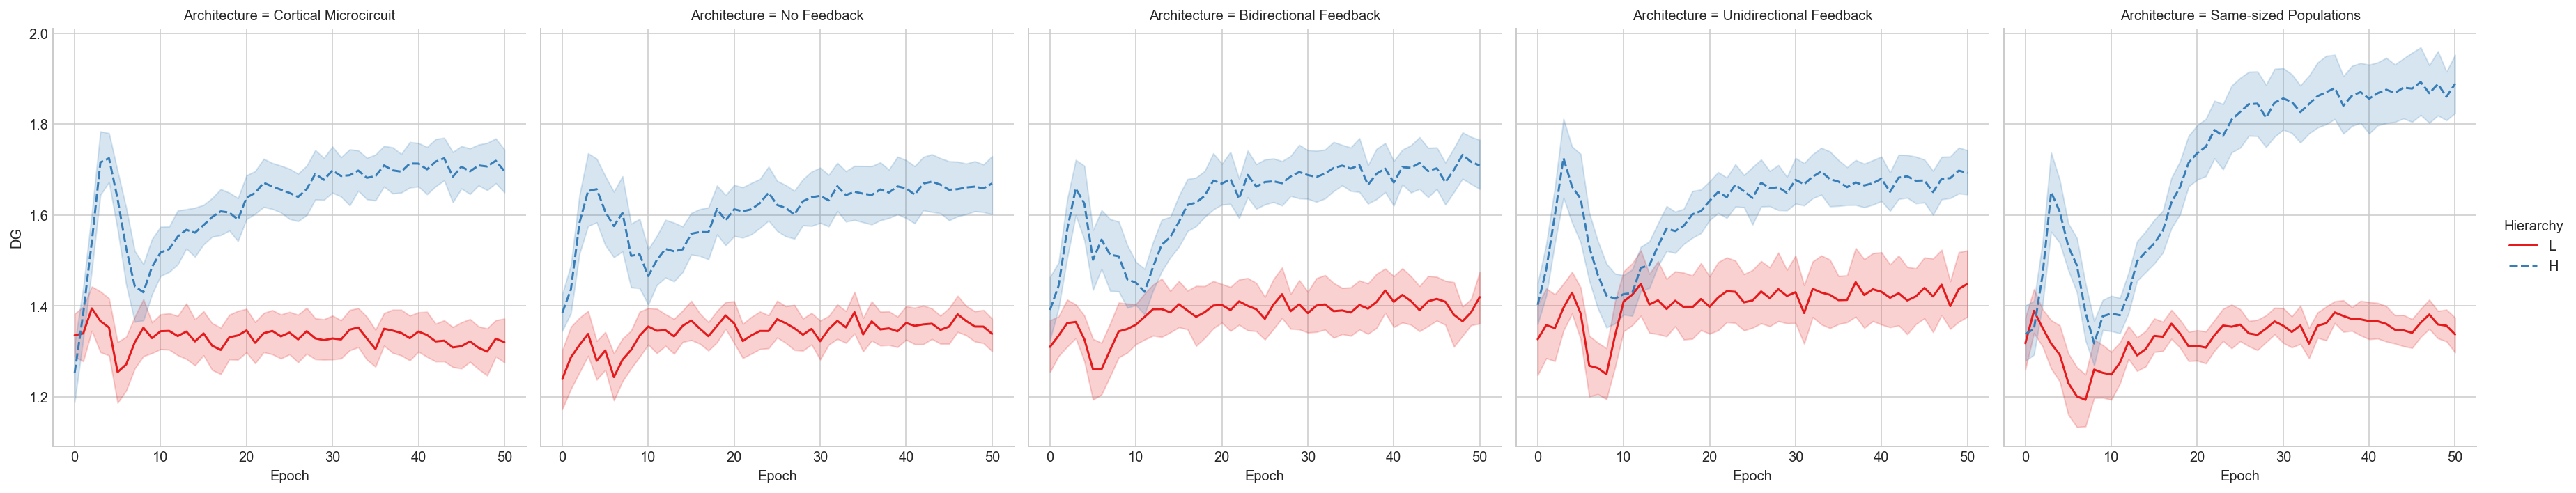

In [562]:
sns.relplot(data=df_dg, x='Epoch', y='DG', hue="Hierarchy", palette='Set1',kind='line',ci=80,
            style="Hierarchy",col="Architecture",height=5, aspect=1)

Text(0.5, 1.05, 'Dimensionality Gain across Architectures (Sequence Learning)')

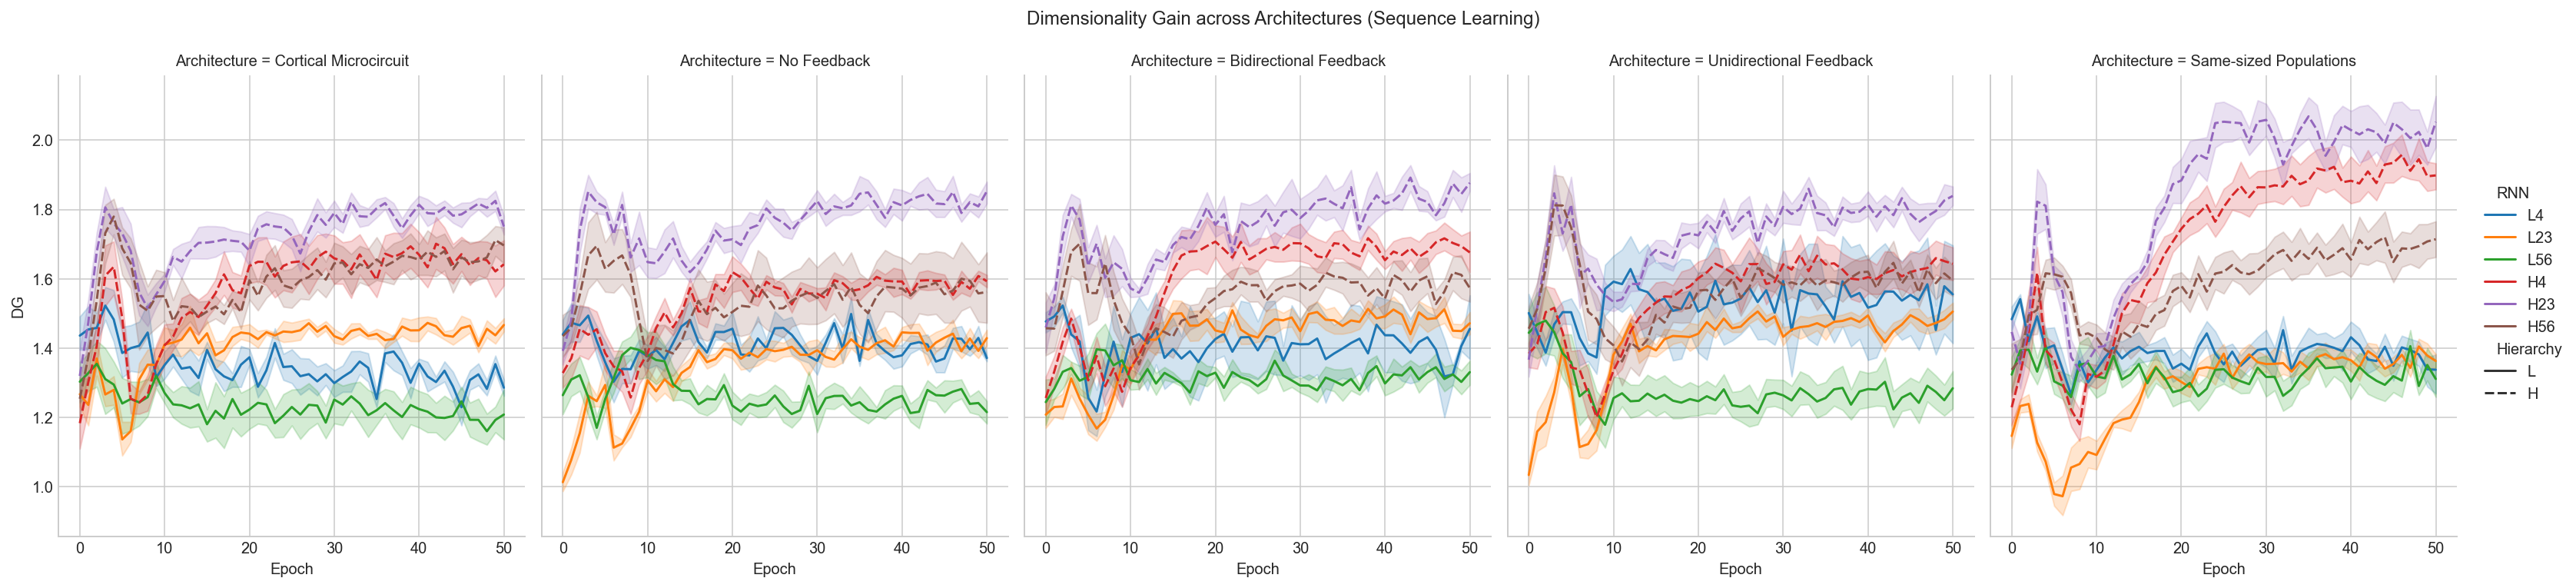

In [567]:
dg_plot = sns.relplot(data=df_dg, x='Epoch', y='DG', hue="RNN", palette='tab10',kind='line',ci=60,
            style="Hierarchy",col="Architecture",height=5, aspect=0.9)
dg_plot.fig.suptitle('Dimensionality Gain across Architectures (Sequence Learning)',y=1.05)

In [568]:
dg_plot.savefig('DG-across-archs-V2.png',dpi=300,bbox_inches='tight')
dg_plot.savefig('DG-across-archs-V2.svg',dpi=300,bbox_inches='tight')

#### Decodability

In [42]:
accs_temp_img = {}

for rnn in rnnNames:
    accs_temp_img[arch_mods[0],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-corticalRNN.npy',allow_pickle=True)
    accs_temp_img[arch_mods[1],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-no-fb.npy',allow_pickle=True)
    accs_temp_img[arch_mods[2],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-bidirectional-fb.npy',allow_pickle=True)
    accs_temp_img[arch_mods[3],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-unidirectional-fb.npy',allow_pickle=True)
    accs_temp_img[arch_mods[4],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-same-pop.npy',allow_pickle=True)

In [43]:
accs_temp_pos = {}

for rnn in rnnNames:
    accs_temp_pos[arch_mods[0],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-corticalRNN.npy',allow_pickle=True)
    accs_temp_pos[arch_mods[1],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-no-fb.npy',allow_pickle=True)
    accs_temp_pos[arch_mods[2],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-bidirectional-fb.npy',allow_pickle=True)
    accs_temp_pos[arch_mods[3],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-unidirectional-fb.npy',allow_pickle=True)
    accs_temp_pos[arch_mods[4],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-same-pop.npy',allow_pickle=True)

In [44]:
accs_temp_surp = {}

for rnn in rnnNames:
    accs_temp_surp[arch_mods[0],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-corticalRNN.npy',allow_pickle=True)
    accs_temp_surp[arch_mods[1],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-no-fb.npy',allow_pickle=True)
    accs_temp_surp[arch_mods[2],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-bidirectional-fb.npy',allow_pickle=True)
    accs_temp_surp[arch_mods[3],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-unidirectional-fb.npy',allow_pickle=True)
    accs_temp_surp[arch_mods[4],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-same-pop.npy',allow_pickle=True)

In [45]:
preds_temp_surp = {}

for rnn in rnnNames:
    preds_temp_surp[arch_mods[0],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-corticalRNN.npy',allow_pickle=True)
    preds_temp_surp[arch_mods[1],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-no-fb.npy',allow_pickle=True)
    preds_temp_surp[arch_mods[2],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-bidirectional-fb.npy',allow_pickle=True)
    preds_temp_surp[arch_mods[3],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-unidirectional-fb.npy',allow_pickle=True)
    preds_temp_surp[arch_mods[4],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-same-pop.npy',allow_pickle=True)

In [46]:
df_temp_img = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','PC Dimension','RNN','Hierarchy'])
df_temp_pos = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','PC Dimension','RNN','Hierarchy'])
df_temp_surp = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','PC Dimension','RNN','Hierarchy'])

In [47]:
for cntr in tqdm(range(len(rnnNames)*nRuns)):
    
    arch = [(k,v) for k,v in accs_temp_img.items()][cntr][0][0]
    rnn = [(k,v) for k,v in accs_temp_img.items()][cntr][0][1]
        
    for rr in range(nRuns):
        for ee in range(n_epochs+1):
            
            if rnn[-1]=='4':
                for pc in dims4:
                    acc = [(k,v) for k,v in accs_temp_img.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_img.loc[len(df_temp_img)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
            else:
                for pc in dims23:
                    acc = [(k,v) for k,v in accs_temp_img.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_img.loc[len(df_temp_img)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]

100%|██████████| 30/30 [02:45<00:00,  5.52s/it]


In [48]:
for cntr in tqdm(range(len(rnnNames)*nRuns)):
    
    arch = [(k,v) for k,v in accs_temp_pos.items()][cntr][0][0]
    rnn = [(k,v) for k,v in accs_temp_pos.items()][cntr][0][1]
        
    for rr in range(nRuns):
        for ee in range(n_epochs+1):
            
            if rnn[-1]=='4':
                for pc in dims4:
                    acc = [(k,v) for k,v in accs_temp_pos.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_pos.loc[len(df_temp_pos)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
            else:
                for pc in dims23:
                    acc = [(k,v) for k,v in accs_temp_pos.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_pos.loc[len(df_temp_pos)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]

100%|██████████| 30/30 [02:51<00:00,  5.73s/it]


In [49]:
for cntr in tqdm(range(len(rnnNames)*nRuns)):
    
    arch = [(k,v) for k,v in accs_temp_surp.items()][cntr][0][0]
    rnn = [(k,v) for k,v in accs_temp_surp.items()][cntr][0][1]
        
    for rr in range(nRuns):
        for ee in range(n_epochs+1):
            
            if rnn[-1]=='4':
                for pc in dims4:
                    acc = [(k,v) for k,v in accs_temp_surp.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_surp.loc[len(df_temp_surp)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
            else:
                for pc in dims23:
                    acc = [(k,v) for k,v in accs_temp_surp.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_surp.loc[len(df_temp_surp)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]

100%|██████████| 30/30 [02:41<00:00,  5.40s/it]


In [74]:
df_temp_surp_preds = pd.DataFrame(columns=['Run','Epoch','Architecture','Prediction','PC Dimension','RNN','Hierarchy'])

In [53]:
labels_surp = np.zeros(24)
labels_surp[12:] = 1

In [54]:
# for cntr in tqdm(range(len(rnnNames)*nRuns)):
    
#     arch = [(k,v) for k,v in preds_temp_surp.items()][cntr][0][0]
#     rnn = [(k,v) for k,v in preds_temp_surp.items()][cntr][0][1]
        
#     for rr in range(nRuns):
#         for ee in range(n_epochs+1):
            
#             if rnn[-1]=='4':
#                 for pc in dims4:
#                     pred = [(k,v) for k,v in preds_temp_surp.items()][cntr][1].item()[rr,pc,ee]
#                     df_temp_surp_preds.loc[len(df_temp_surp_preds)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
#             else:
#                 for pc in dims23:
#                     pred = [(k,v) for k,v in preds_temp_surp.items()][cntr][1].item()[rr,pc,ee]
#                     df_temp_surp_preds.loc[len(df_temp_surp_preds)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]

Text(0.5, 1.0, 'Image Decoding Accuracy across Architectures in presence of Temporal Violation')

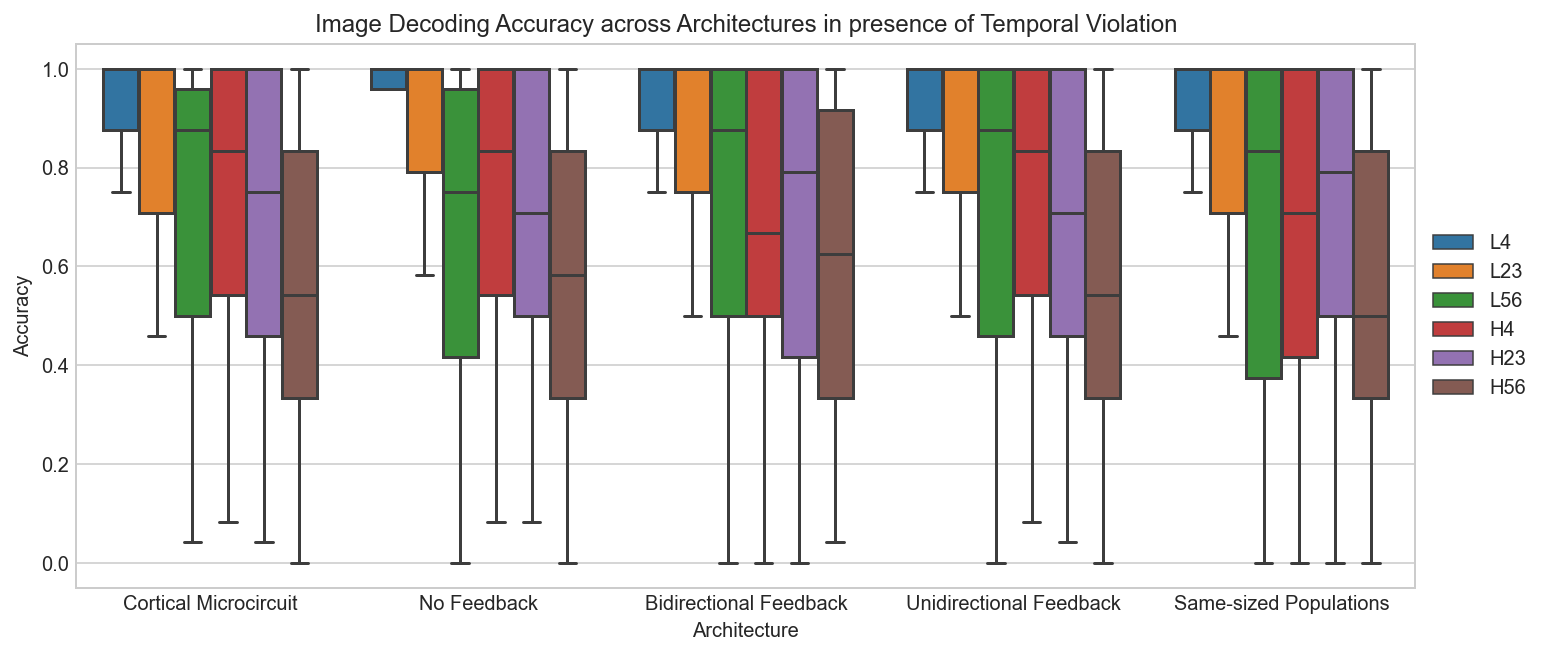

In [55]:
f = plt.figure(figsize=(12,5))
sns.boxplot(data=df_temp_img, x='Architecture', y='Accuracy', hue="RNN", palette='tab10',
            dodge=True,fliersize=0.0,width=0.8,whis=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Image Decoding Accuracy across Architectures in presence of Temporal Violation')

Text(0.5, 1.0, 'Image Decoding Accuracy across Architectures in presence of Temporal Violation')

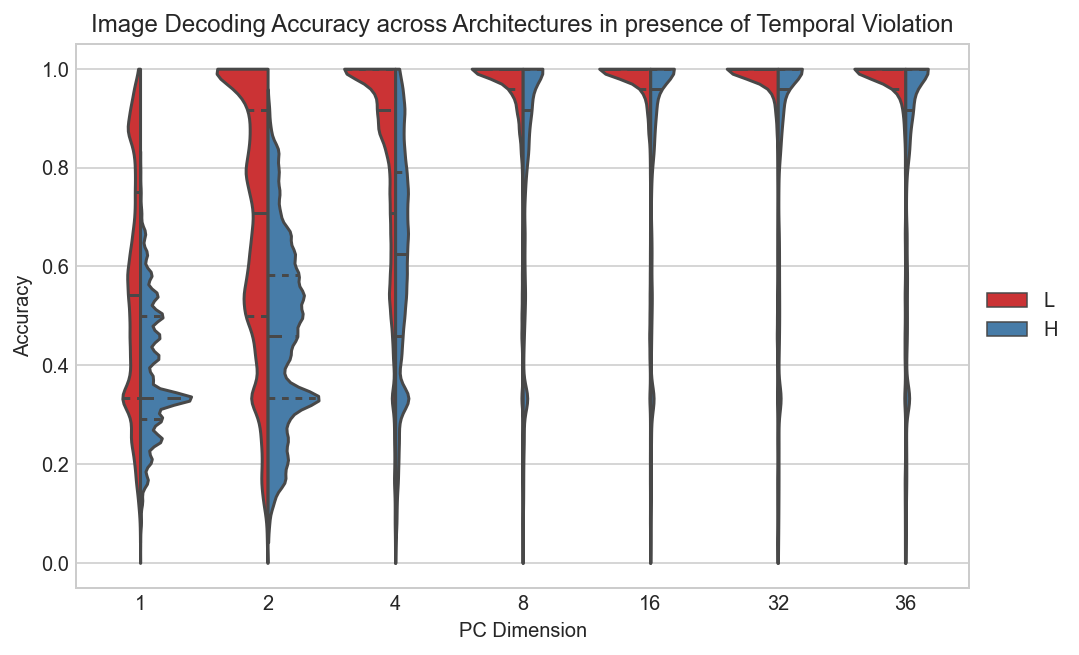

In [56]:
f = plt.figure(figsize=(8,5))
sns.violinplot(data=df_temp_img, x='PC Dimension', y='Accuracy', hue="Hierarchy", palette='Set1',split=True,
            dodge=True,fliersize=0.0,width=0.8,whis=1,bw=0.1,inner='quartile',cut=0,scale='area')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Image Decoding Accuracy across Architectures in presence of Temporal Violation')

In [57]:
# f = plt.figure(figsize=(12,5))
# sns.violinplot(data=df_temp_img, x='Epoch', y='Accuracy', hue="Hierarchy", palette='Set1',split=True,
#             dodge=True,fliersize=0.0,width=0.8,whis=1,bw=0.1,inner='quartile',cut=0,scale='area')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Image Decoding Accuracy across Architectures in presence of Temporal Violation')

Text(0.5, 1.0, 'Position Decoding Accuracy across Architectures')

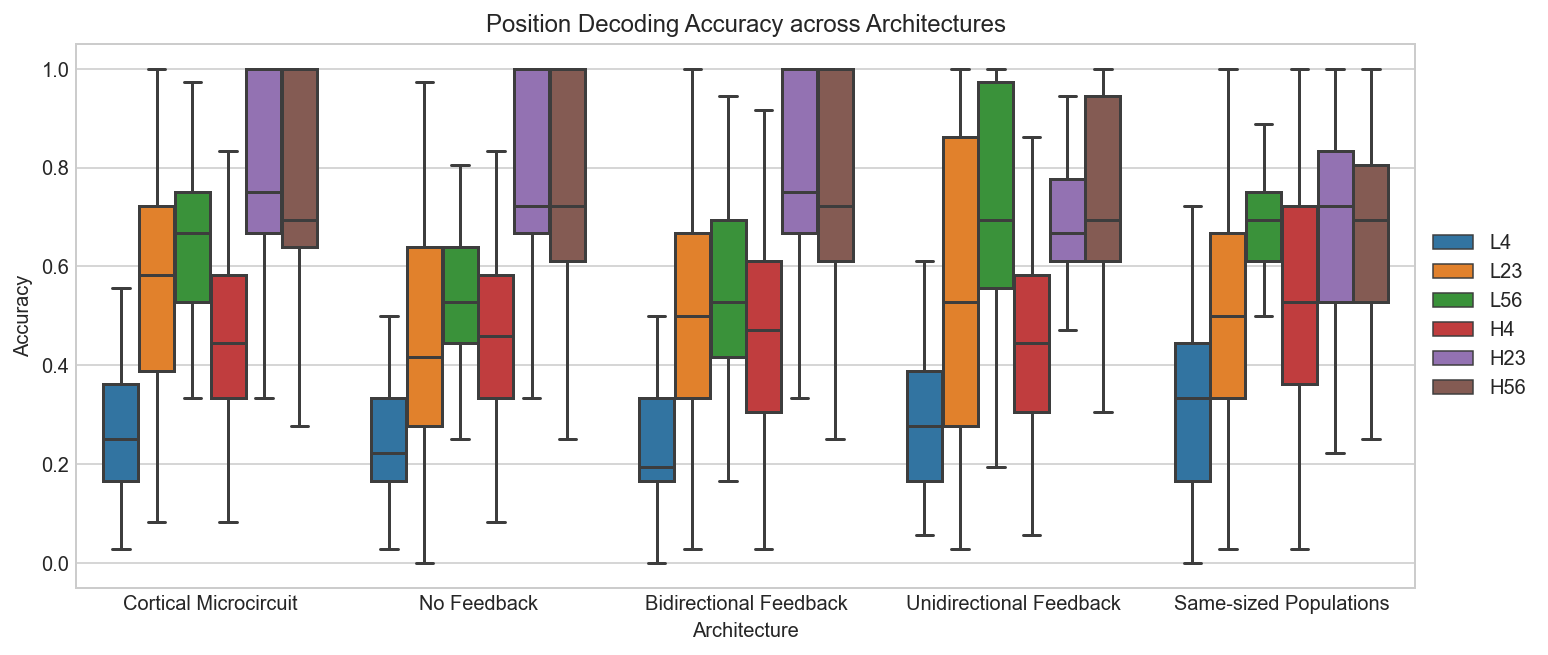

In [58]:
f = plt.figure(figsize=(12,5))
sns.boxplot(data=df_temp_pos, x='Architecture', y='Accuracy', hue="RNN", palette='tab10',
            dodge=True,fliersize=0.0,width=0.8,whis=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Position Decoding Accuracy across Architectures')

In [59]:
# f = plt.figure(figsize=(8,5))
# sns.violinplot(data=df_temp_pos, x='PC Dimension', y='Accuracy', hue="Hierarchy", palette='Set1',split=True,
#             dodge=True,fliersize=0.0,width=0.8,whis=1,bw=0.1,inner='quartile',cut=0,scale='area')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Position Decoding Accuracy across Architectures in presence of Temporal Violation')

In [60]:
# f = plt.figure(figsize=(12,5))
# sns.violinplot(data=df_temp_pos, x='PC Dimension', y='Accuracy', hue="RNN", palette='tab10',split=False,
#             dodge=True,fliersize=0.0,width=0.8,whis=1,bw=0.1,inner='quartile',cut=0,scale='area')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Position Decoding Accuracy across Architectures in presence of Temporal Violation')

Text(0.5, 1.0, 'Unexpectedness Decoding Accuracy across Architectures')

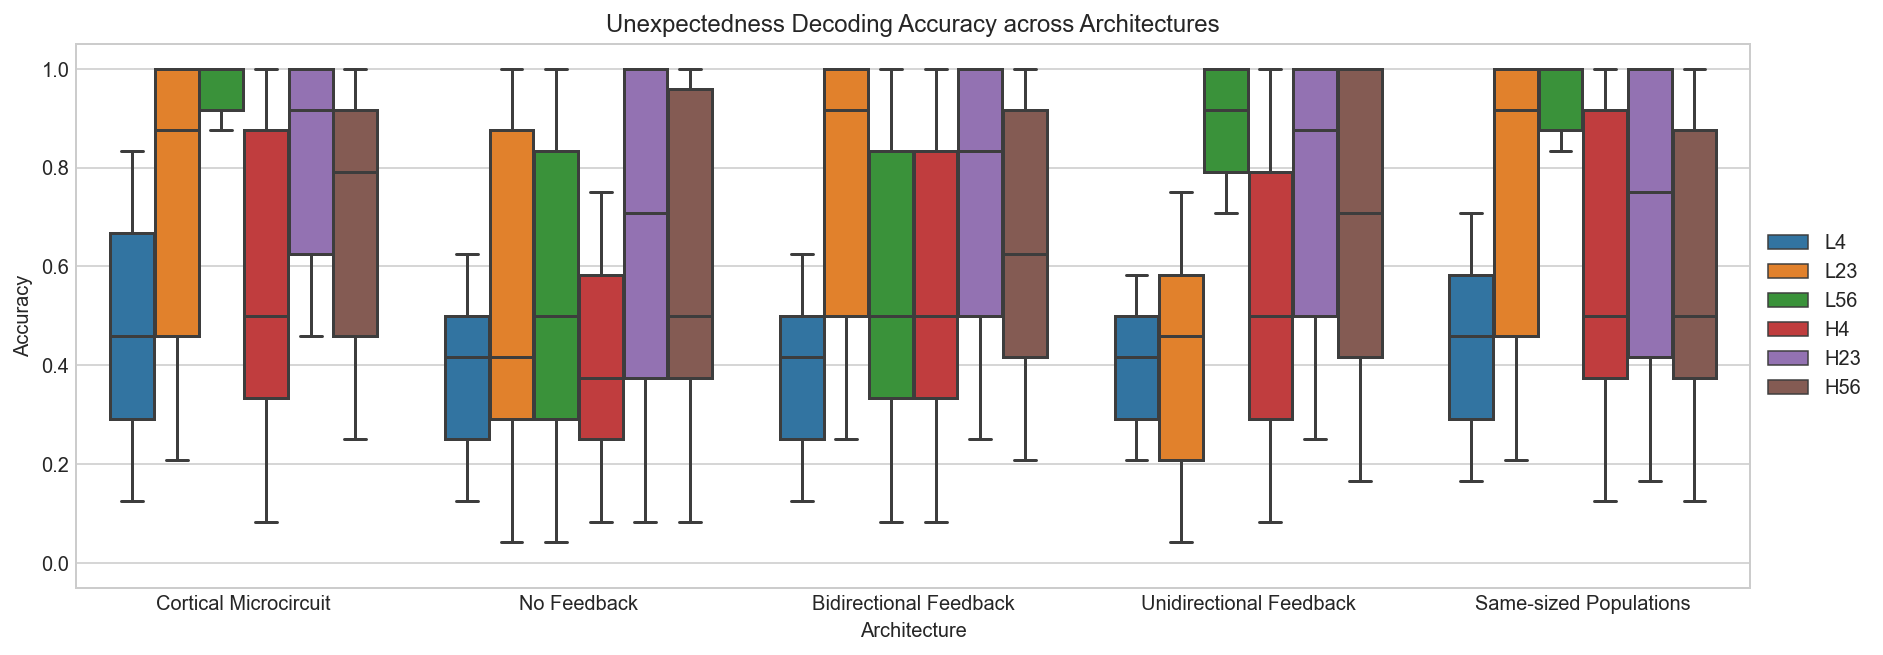

In [61]:
f = plt.figure(figsize=(15,5))
sns.boxplot(data=df_temp_surp, x='Architecture', y='Accuracy', hue="RNN", palette='tab10',
            dodge=True,fliersize=0.0,width=0.8,whis=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Unexpectedness Decoding Accuracy across Architectures')

#### Decoding surprise at init

In [62]:
arch_mods

['Cortical Microcircuit',
 'No Feedback',
 'Bidirectional Feedback',
 'Unidirectional Feedback',
 'Same-sized Populations']

In [63]:
ix = df_temp_surp['Epoch'] == 0
df_init_surp = df_temp_surp[ix]

In [64]:
ixFB = np.vstack((
                  (np.where((df_init_surp['RNN']=='L23')*(df_init_surp['Architecture']==arch_mods[0])>0)[0]),
    (np.where((df_init_surp['RNN']=='L56')*(df_init_surp['Architecture']==arch_mods[0])>0)[0]),
    (np.where((df_init_surp['RNN']=='L23')*(df_init_surp['Architecture']==arch_mods[2])>0)[0]),
    (np.where((df_init_surp['RNN']=='L56')*(df_init_surp['Architecture']==arch_mods[3])>0)[0]),
    (np.where((df_init_surp['RNN']=='L23')*(df_init_surp['Architecture']==arch_mods[4])>0)[0]),
    (np.where((df_init_surp['RNN']=='L56')*(df_init_surp['Architecture']==arch_mods[4])>0)[0])
))

ixFB = ixFB.ravel()
fb_indicator = np.array(['Other']*len(df_init_surp))
fb_indicator[ixFB] = 'FB'
fb_indicator = list(fb_indicator)

In [65]:
df_init_surp['Feedback Indicator'] = fb_indicator

C:\Users\ABALWA~1\AppData\Local\Temp/ipykernel_204296/59316821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_init_surp['Feedback Indicator'] = fb_indicator


Text(0.5, 1.0, 'Temporal Unexpectedness Decoding Accuracy across Architectures at Initialization')

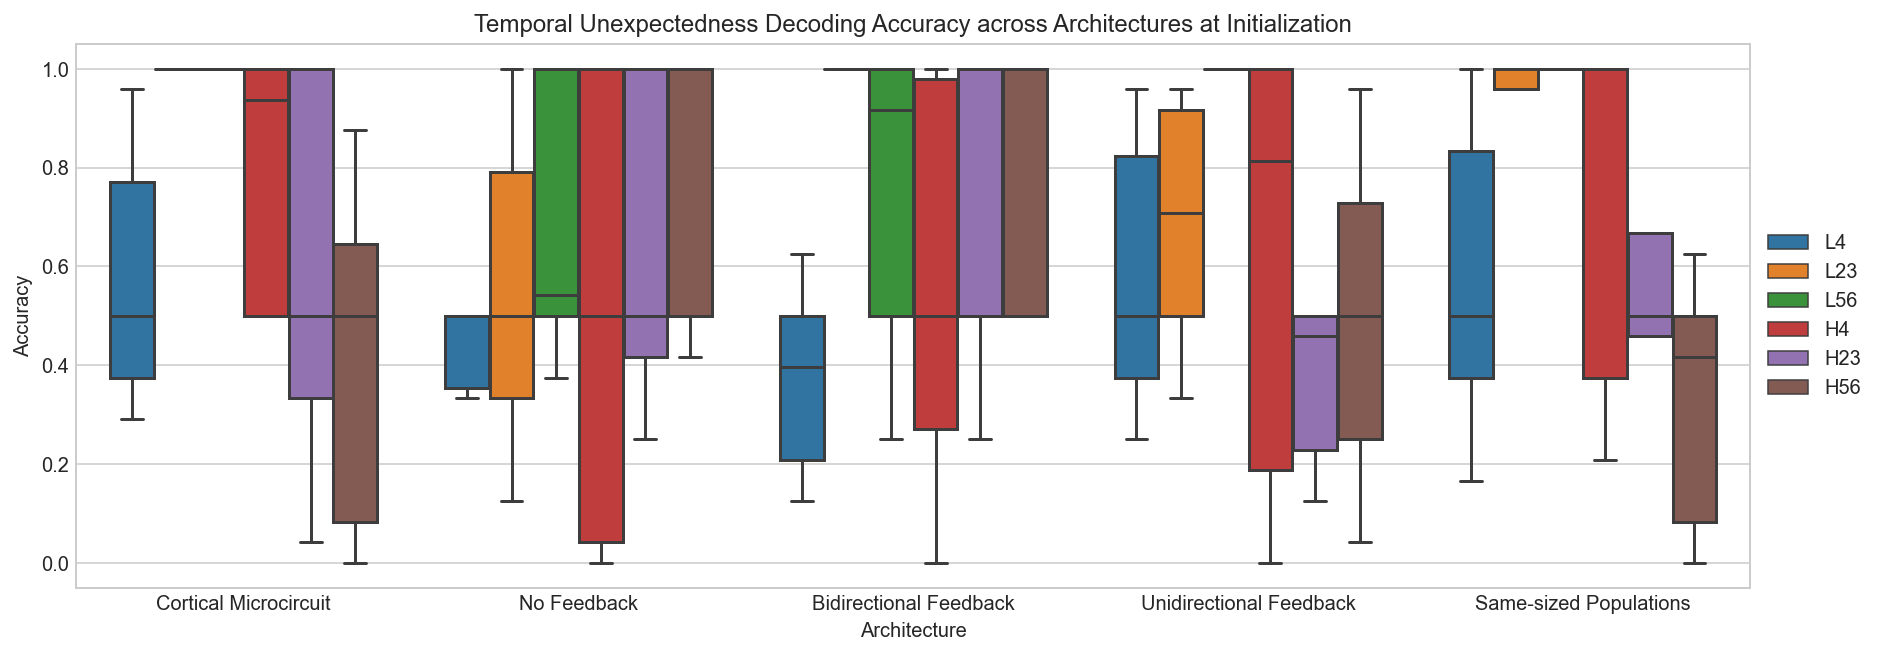

In [66]:
f = plt.figure(figsize=(15,5))
sns.boxplot(data=df_temp_surp[ix], x='Architecture', y='Accuracy', hue="RNN", palette='tab10',
            dodge=True,fliersize=0.0,width=0.8,whis=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temporal Unexpectedness Decoding Accuracy across Architectures at Initialization')

Text(0.5, 1.0, 'Temporal Unexpectedness Decoding Accuracy across Architectures at Initialization')

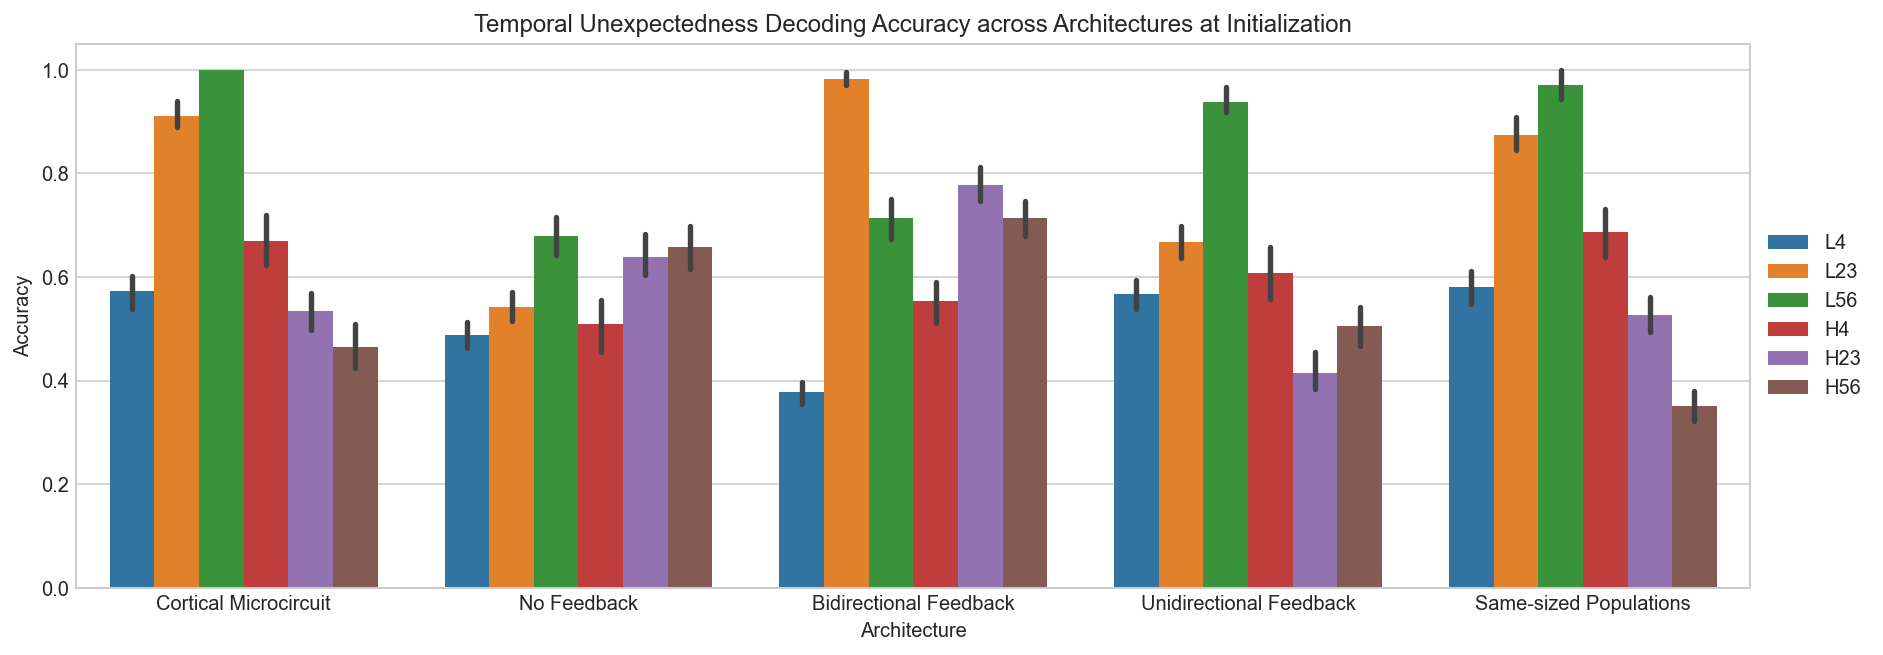

In [67]:
f = plt.figure(figsize=(15,5))
sns.barplot(data=df_temp_surp[ix], x='Architecture', y='Accuracy', hue="RNN", palette='tab10',ci=50)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temporal Unexpectedness Decoding Accuracy across Architectures at Initialization')

In [68]:
# cols_dark = ['#1b9e77','#d95f02']
# cols_dark_r = ['#7570b3','#1b9e77']

In [ ]:
cols_dark = ['#1b9e77','#d95f02']
cols_dark_r = ['#7570b3','#1b9e77']

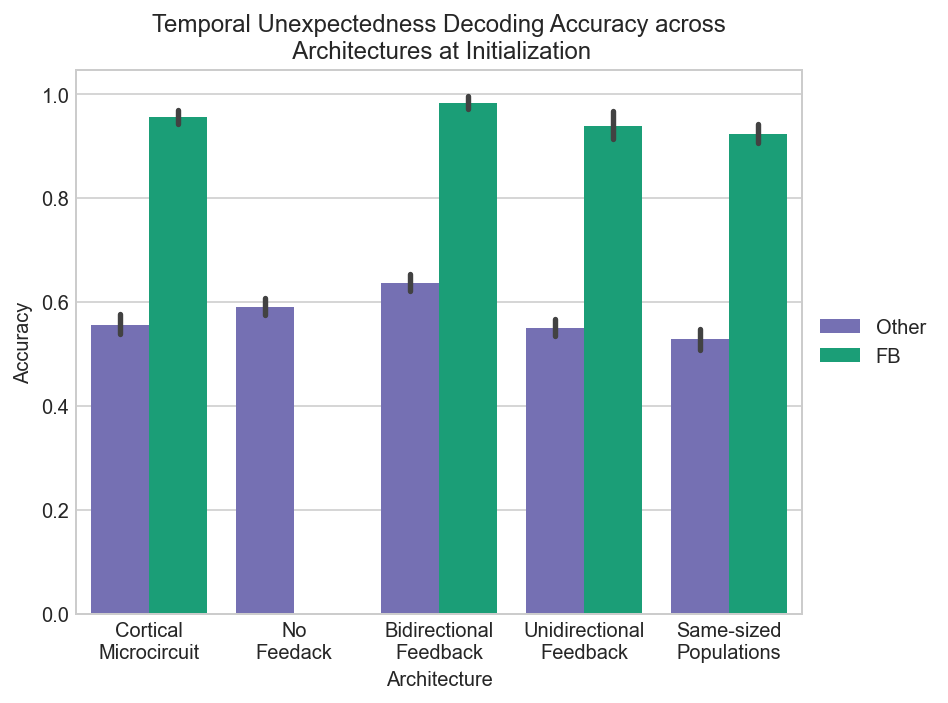

In [69]:
fsurpinit = plt.figure(figsize=(6.5,5))
sns.barplot(data=df_init_surp, x='Architecture', y='Accuracy', hue="Feedback Indicator", palette=cols_dark_r,ci=50,saturation=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temporal Unexpectedness Decoding Accuracy across\n Architectures at Initialization')
plt.xticks(np.arange(len(arch_mods)),
           ['Cortical\nMicrocircuit','No\nFeedack','Bidirectional\nFeedback',
            'Unidirectional\nFeedback','Same-sized\nPopulations'])
plt.show()

In [70]:
fsurpinit.savefig('Accs-surp-init-across-archs-V2.png',dpi=300,bbox_inches='tight')
fsurpinit.savefig('Accs-surp-init-across-archs-V2.svg',dpi=300,bbox_inches='tight')

In [503]:
# f = plt.figure(figsize=(12,5))
# sns.stripplot(data=df_temp_surp[ix], x='Architecture', y='Accuracy', hue="RNN", palette='tab10',dodge=True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Temporal Unexpectedness Decoding Accuracy across Architectures at Initialization')

In [331]:
# g3 = sns.catplot(data=df_temp_surp, x='Architecture', y='Accuracy', hue="RNN", palette='tab10',
#                 kind="violin", inner=None, height=5, aspect=2,cut=0)
# sns.stripplot(data=df_temp_surp[ix], x='Architecture', y='Accuracy', hue="RNN", palette='tab10',dodge=True,ax=g3.ax)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [214]:
# f = plt.figure(figsize=(12,5))
# sns.boxplot(data=df_temp_surp, x='Architecture', y='Accuracy', hue="Hierarchy", palette='Set1',
#             dodge=True,fliersize=0.0,width=0.8,whis=1)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title('Unexpectedness Accuracy across Architectures in presence of Temporal Violation')

#### Heatmap

In [75]:
ix2 = df_temp_surp_preds['Epoch'] == 0

In [76]:
# sns.heatmap(data=df_temp_surp_preds[ix].pivot(index='Architecture', columns='', values='Accuracy'))

In [77]:
ix_img = df_temp_img['Architecture'] == arch_mods[0]
ix_pos = df_temp_pos['Architecture'] == arch_mods[0]
ix_surp = df_temp_surp['Architecture'] == arch_mods[0]

#### Joint temporal violin plots

In [78]:
df_temporal_violations = pd.concat([df_temp_img[ix_img], df_temp_pos[ix_pos], df_temp_surp[ix_surp]])

In [79]:
# df_temporal_violations['Decoding Variable'] = ['Input ID (Temporal Violation)']*sum(ix_img) + ['Temporal Position']*sum(ix_pos) + ['Temporal Surprise']*sum(ix_surp)

In [ ]:
df_temporal_violations['Decoding Variable'] = ['Input ID']*sum(ix_img) + ['Position in Seq.']*sum(ix_pos) + ['Temporal Surprise']*sum(ix_surp)

Text(0.5, 1.0, 'Decoding Accuracies in the Cortical Microcircuit across Task variables (Sequence Learning)')

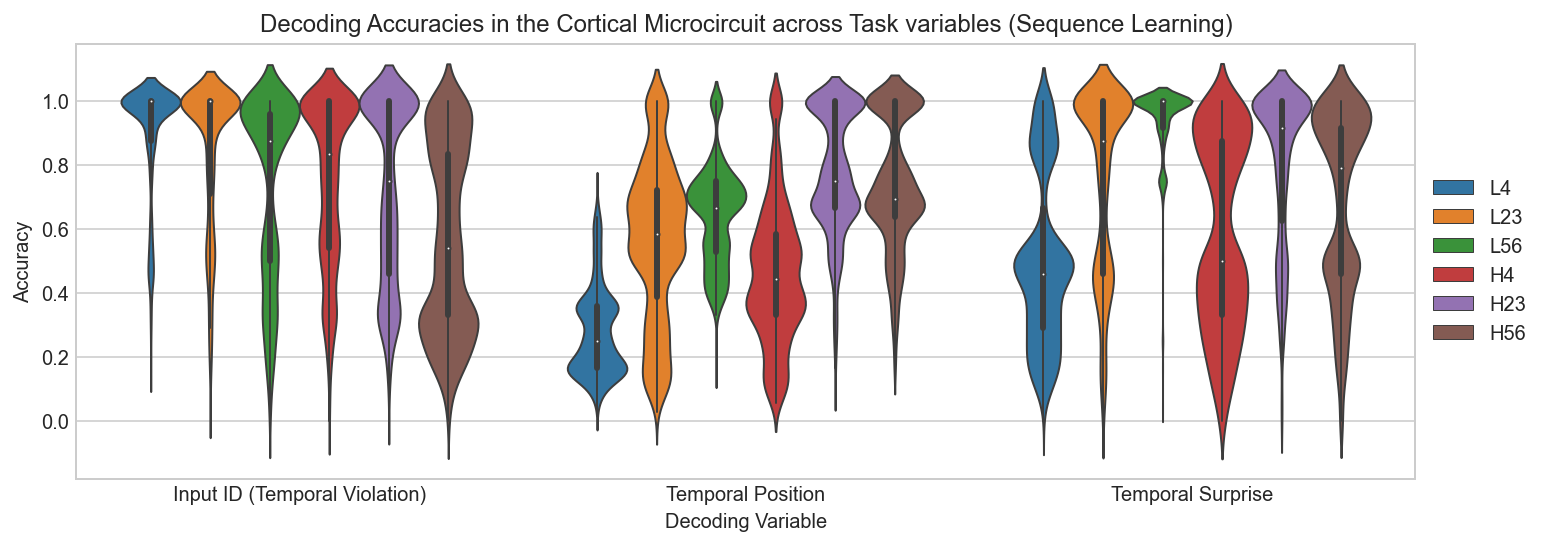

In [82]:
figTaskVariables = plt.figure(figsize=(12,4))
sns.violinplot(data=df_temporal_violations, x='Decoding Variable', y='Accuracy', hue="RNN", palette='tab10',
            dodge=True,fliersize=0.0,width=0.8,whis=0.5,bw=0.2,scale='width',linewidth=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Decoding Accuracies in the Cortical Microcircuit across Task variables (Sequence Learning)')

In [83]:
figTaskVariables.savefig('Accs-across-task-vars-V2.png',dpi=300,bbox_inches='tight')
figTaskVariables.savefig('Accs-across-task-vars-V2.svg',dpi=300,bbox_inches='tight')

#### Image In and Image Out Decoding

#### Denoising analyses

In [42]:
df_denoising_corticalRNN = pd.read_pickle(pp+'df_denoising_corticalRNN.pkl')
df_denoising_no_fb = pd.read_pickle(pp+'df_denoising_no-fb.pkl')
df_denoising_bidirectional_fb = pd.read_pickle(pp+'df_denoising_bidirectional-fb.pkl')
df_denoising_single_fb = pd.read_pickle(pp+'df_denoising_single-fb.pkl')
df_denoising_same_pop = pd.read_pickle(pp+'df_denoising_same-pop.pkl')

In [43]:
len_denoising = len(df_denoising_corticalRNN)

In [44]:
df_denoising_corticalRNN['Architecture'] = [arch_mods[0]]*len_denoising
df_denoising_no_fb['Architecture'] = [arch_mods[1]]*len_denoising
df_denoising_bidirectional_fb['Architecture'] = [arch_mods[2]]*len_denoising
df_denoising_single_fb['Architecture'] = [arch_mods[3]]*len_denoising
df_denoising_same_pop['Architecture'] = [arch_mods[4]]*len_denoising

In [45]:
df_denoising = pd.concat([df_denoising_corticalRNN,df_denoising_no_fb,
                          df_denoising_bidirectional_fb,df_denoising_single_fb,df_denoising_same_pop])

In [62]:
df_denoising = df_denoising[df_denoising["Epoch"] == 50]

In [63]:
cols_list_denoising = cols_list[1:]

Text(0.5, 1.0, 'Noise Norms across Architectures in presence of Violations (Sequence Learning)')

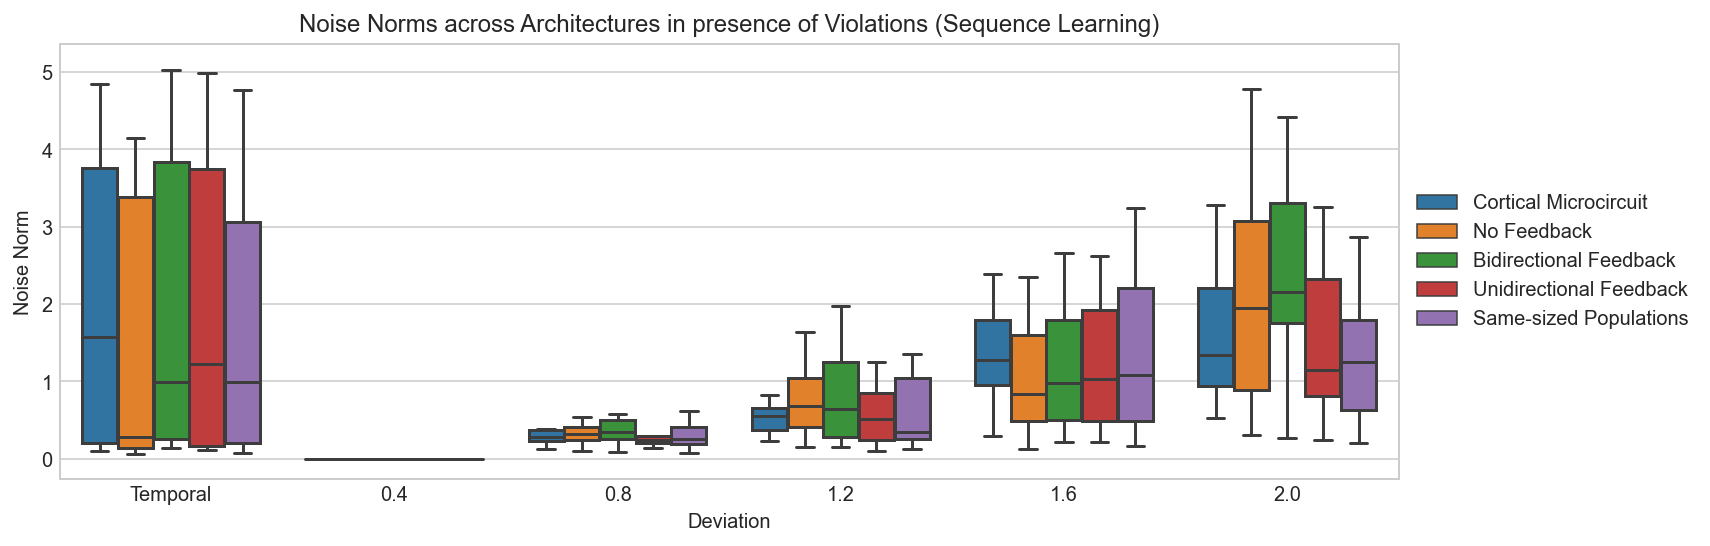

In [64]:
figDenoisingNoiseNorm = plt.figure(figsize=(12,4))
sns.boxplot(data=df_denoising, x='Deviation', y='Noise Norm', hue="Architecture",
            dodge=True,fliersize=0.0,width=0.8,whis=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Noise Norms across Architectures in presence of Violations (Sequence Learning)')

Text(0.5, 1.0, 'Cosine Similarity across Architectures in presence of Violations (Sequence Learning)')

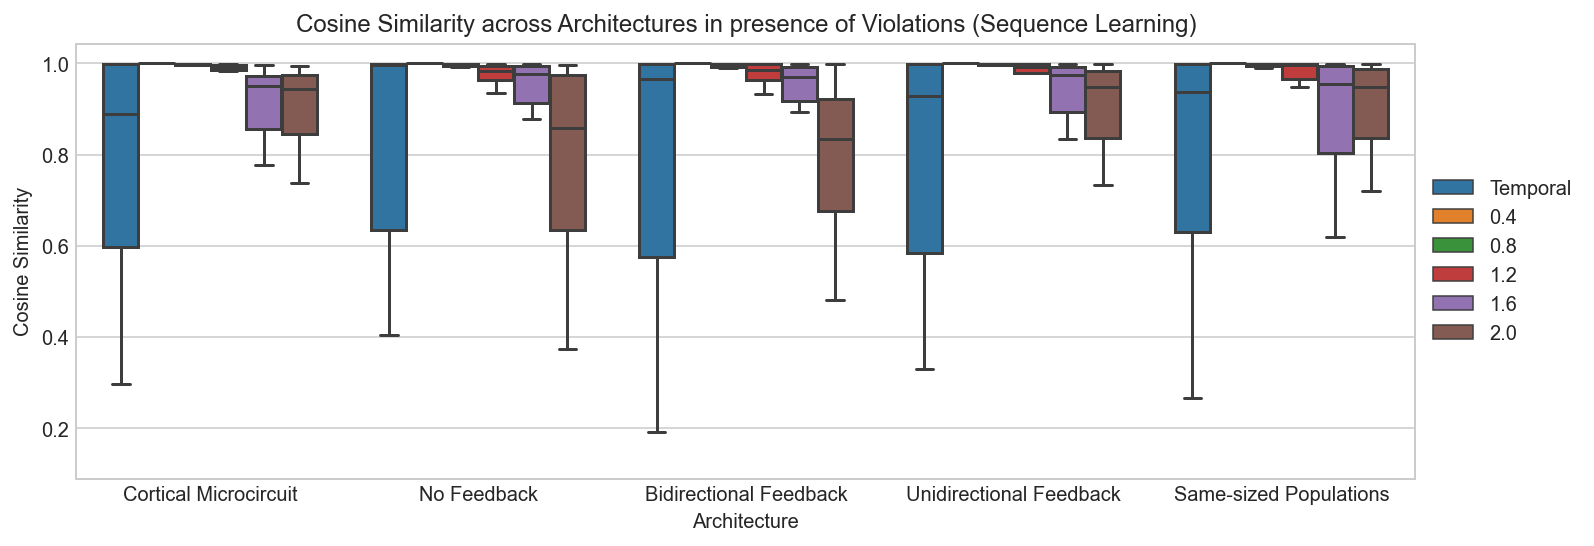

In [65]:
figDenoisingCosineSim = plt.figure(figsize=(12,4))
sns.boxplot(data=df_denoising, x='Architecture', y='Cosine Similarity', hue="Deviation",
            dodge=True,fliersize=0.0,width=0.8,whis=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cosine Similarity across Architectures in presence of Violations (Sequence Learning)')

In [66]:
# df_denoising[df_denoising["Violation"] == 'Temporal violation']

Text(0.5, 1.0, 'Noise Norms across Architectures in presence of Violations (Sequence Learning)')

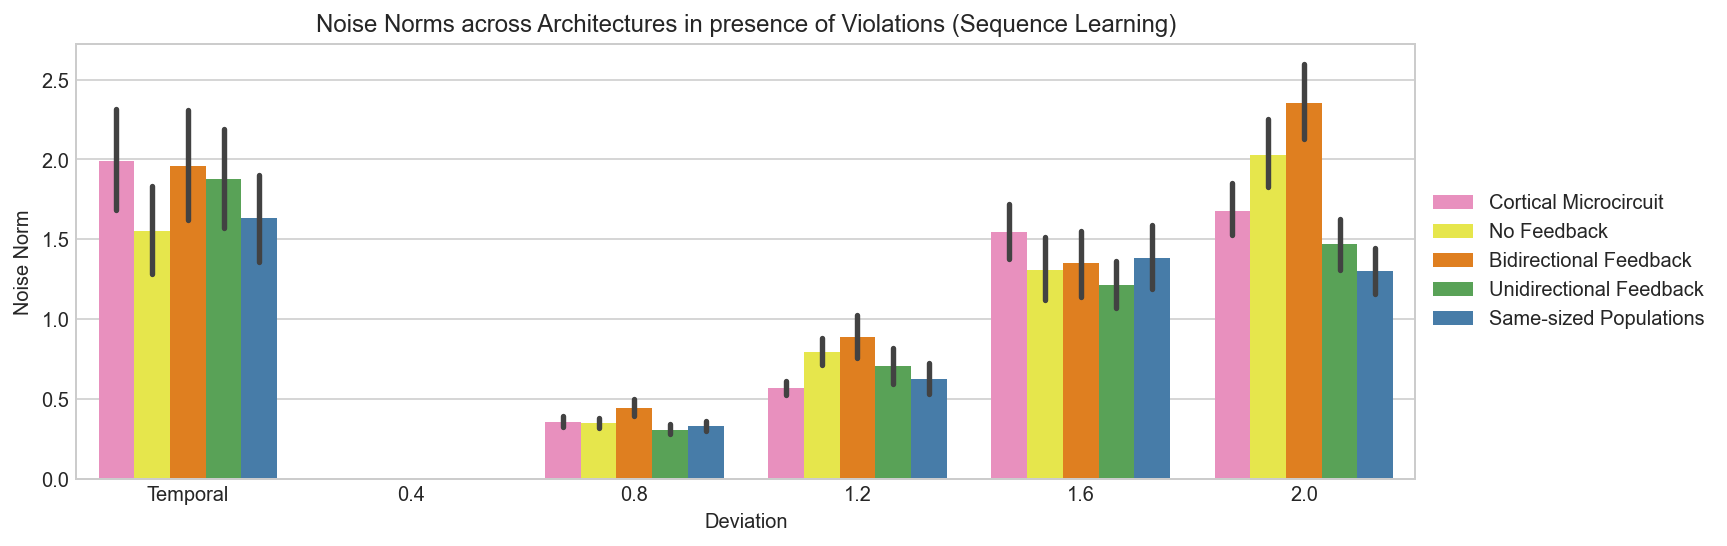

In [67]:
figDenoisingNoiseNorm = plt.figure(figsize=(12,4))
sns.barplot(data=df_denoising, x='Deviation', y='Noise Norm', hue="Architecture",palette='Set1_r')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Noise Norms across Architectures in presence of Violations (Sequence Learning)')

Text(0.5, 1.0, 'Cosine Similarity across Architectures in presence of Violations (Sequence Learning)')

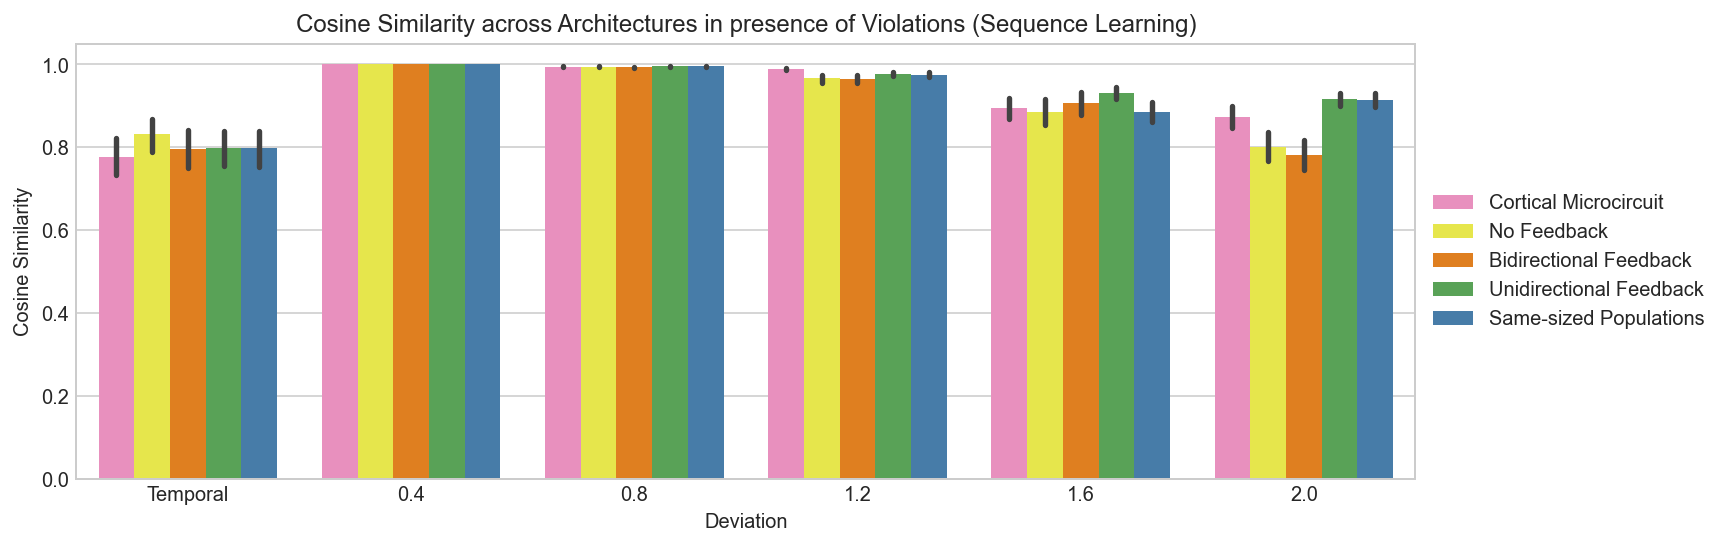

In [68]:
figDenoisingCosineSim = plt.figure(figsize=(12,4))
sns.barplot(data=df_denoising, x='Deviation', y='Cosine Similarity', hue="Architecture",palette='Set1_r')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cosine Similarity across Architectures in presence of Violations (Sequence Learning)')